In [1]:
%pylab inline
import px4tools

Populating the interactive namespace from numpy and matplotlib
attempting to monkey patch pandas timedelta series plotting
monkey patch suceeded


In [2]:
d = px4tools.ulog.cached_log_processing(
    log='/home/jgoppert/git/px4/src/px4/build_posix_sitl_default/'
    'tmp/rootfs/fs/microsd/log/2017-01-25/07_18_50.ulg',
    msg_filter='',
    processing_func=lambda x: x,
    save_path='./logs/2017-01-25-sitl-mission-uneven.pkl',
    force_processing=False)
dt = 0.01
d = d.concat(dt=dt).ffill().bfill()
d = px4tools.ulog.compute_data(d)


ESTIMATOR ANALYSIS
-----------------------------------

attitude error:
	roll  mean:   0.461691	std:	  1.267969	deg
	pitch mean:  -0.956500	std:	  1.293819	deg
	yaw   mean:  -1.547909	std:	  2.439739	deg

position error:
	x mean:  -0.450540	std:	  1.368842	m
	y mean:   2.315358	std:	  3.378323	m
	z mean:   0.893313	std:	  0.402499	m

velocity error:
	x mean:  -0.037504	std:	  0.132093	m/s
	y mean:   0.049079	std:	  0.204917	m/s
	z mean:  -0.009226	std:	  0.183574	m/s



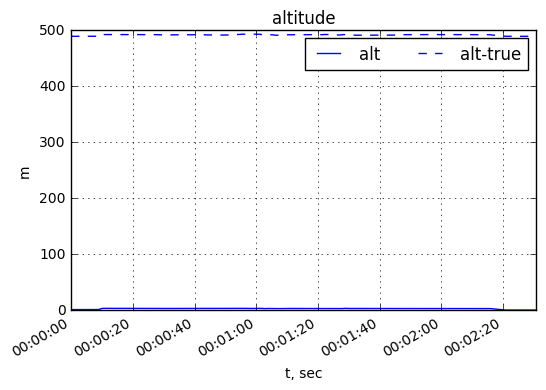

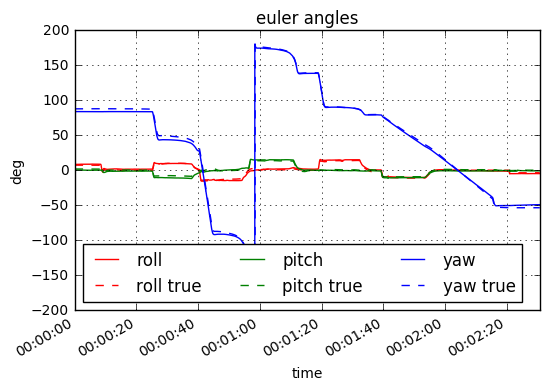

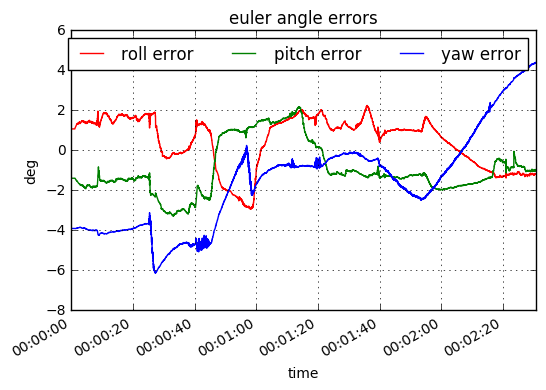

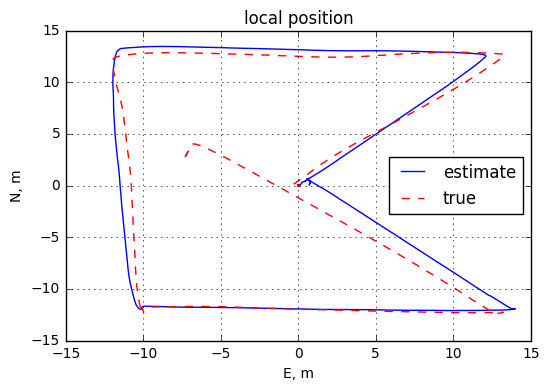

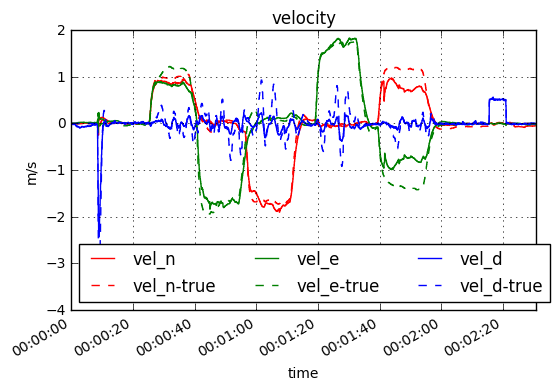

In [3]:
px4tools.estimator_analysis(d)
plt.gcf().autofmt_xdate()

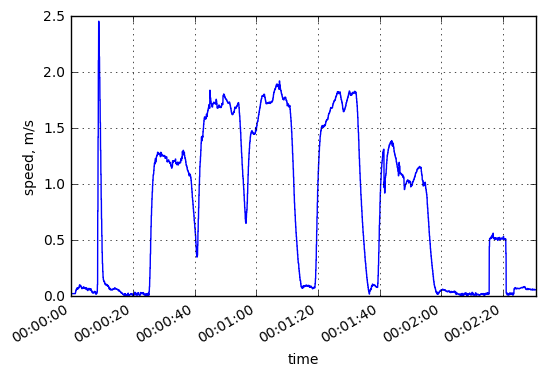

In [4]:
d.t_vehicle_local_position_0__f_speed.plot()
plt.gcf().autofmt_xdate()
plt.ylabel('speed, m/s')
plt.xlabel('time')
plt.grid()

In [5]:
path_length = d.t_vehicle_local_position_0__f_speed.sum()*0.1
path_length

1180.5024638129528

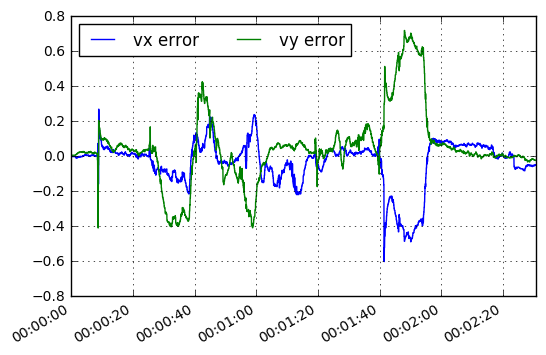

In [6]:
d.t_vehicle_local_position_0__f_vx_error.plot(label='vx error')
d.t_vehicle_local_position_0__f_vy_error.plot(label='vy error')
plt.legend(ncol=2, loc='best')
plt.grid()
plt.gcf().autofmt_xdate()